In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [9]:
data = pd.read_csv('shippers_clearing_fees.csv')
data.head(5)

,category,weight,cost
0,shoes,3,257.34
1,shoes,4,287.12
2,other,2,130.58
3,electronics,3,97.78
4,clothing,3,153.87


In [10]:
data.shape

(250, 3)

In [27]:
data.dtypes

category     object
weight        int64
cost        float64
dtype: object

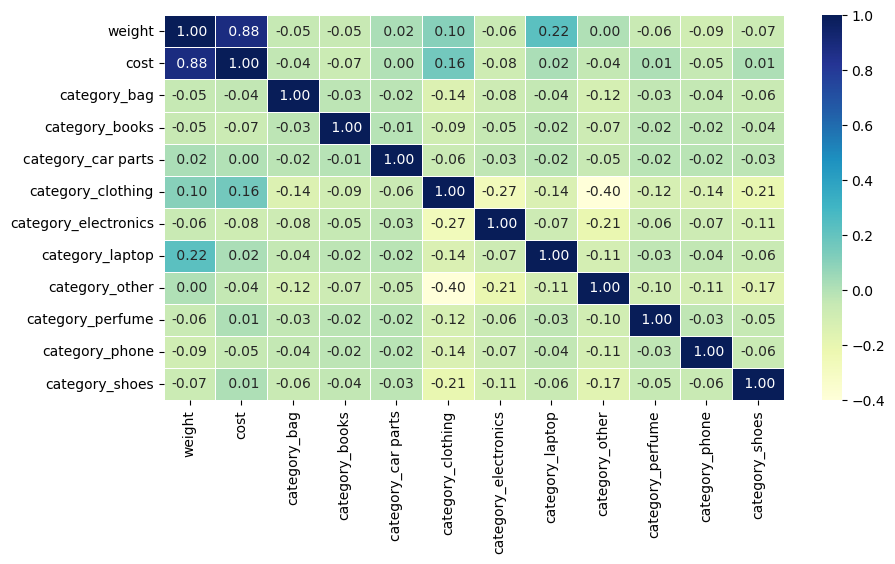

In [13]:
data_encoded = pd.get_dummies(data, drop_first=True)
corr_matrix = data_encoded.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=" .2f", cmap="YlGnBu")

In [54]:
models = {'RandomForest': RandomForestRegressor(),
          'Linear Regression': LinearRegression(),
          'Lasso': Lasso(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'Ridge': Ridge()
         }

In [55]:
def rmsle(y_true, y_pred):
    offset = abs(min(min(y_true), min(y_pred))) + 1 if min(min(y_true), min(y_pred)) <= 0 else 0

    y_true_shifted = y_true + offset
    y_pred_shifted = y_pred + offset

    return np.sqrt(mean_squared_log_error(y_true_shifted, y_pred_shifted))

def show_scores(models, X_train, X_test, y_train, y_test):
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        scores = {
                  'MAE': mean_absolute_error(y_test, preds),
                  'RMSLE': rmsle(y_test, preds),
                  'MSE': mean_squared_error(y_test, preds),
                  'R^2': r2_score(y_test, preds)}
        model_scores[name] = scores
    return model_scores

In [56]:
X = data.drop(['cost'], axis=1)
X.head()

,category,weight
0,shoes,3
1,shoes,4
2,other,2
3,electronics,3
4,clothing,3


In [57]:
y = data['cost']
y

0       257.34
1       287.12
2       130.58
3        97.78
4       153.87
        ...   
245    1832.12
246     126.26
247      89.30
248      59.18
249     393.19
Name: cost, Length: 250, dtype: float64

In [58]:
worded_features = ['category']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   worded_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 500 stored elements and shape (250, 12)>

In [59]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)
scores = show_scores(models, X_train, X_test, y_train, y_test)
mae_scores={}
for name in scores:
    print(name)
    print('MAE: ', scores[name]['MAE'])
    print('RMSLE: ', scores[name]['RMSLE'])
    print('MSE: ', scores[name]['MSE'])
    print('R^2: ', scores[name]['R^2'])
    print('\n')
    mae_scores[name] = scores[name]['MAE']

RandomForest
MAE:  58.64660931322234
RMSLE:  0.4995783115695143
MSE:  7492.825977696542
R^2:  0.7582590499121769


Linear Regression
MAE:  54.29026305028738
RMSLE:  0.7026971437468511
MSE:  6101.874789865743
R^2:  0.8031352905552798


Lasso
MAE:  51.70754602507455
RMSLE:  0.6874589337038336
MSE:  5348.410400475436
R^2:  0.8274443026544169


Gradient Boosting
MAE:  62.38142870363231
RMSLE:  0.4811757414007822
MSE:  9914.802832517687
R^2:  0.6801188411687764


Ridge
MAE:  52.22961993546227
RMSLE:  0.6849167858557613
MSE:  5443.875880675395
R^2:  0.8243643010698583




In [60]:
mae_scores

{'RandomForest': 58.64660931322234,
 'Linear Regression': 54.29026305028738,
 'Lasso': 51.70754602507455,
 'Gradient Boosting': 62.38142870363231,
 'Ridge': 52.22961993546227}

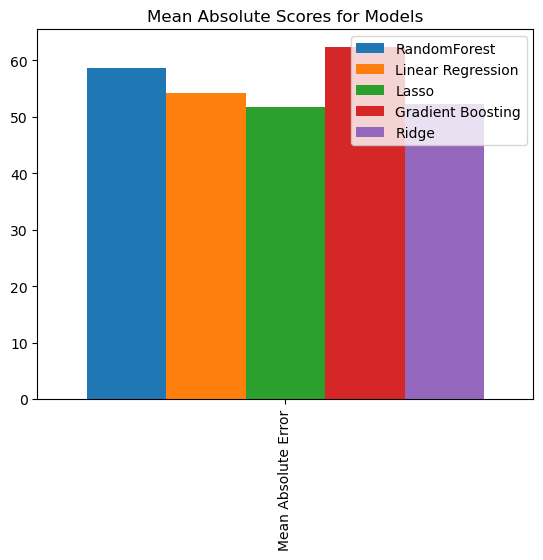

In [61]:
comparison = pd.DataFrame(mae_scores, index=["Mean Absolute Error"])
comparison.plot.bar(width=2);
plt.title("Mean Absolute Scores for Models");